In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.443596874035244e-09


In [7]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


In [8]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 6.441452091834175e-09


In [9]:
weights_unenc_sklearn

array([ 0.03660665,  0.10538843,  0.15870966, -0.13818907, -0.0250314 ,
       -0.19183006,  0.05064763, -0.00488692])

In [10]:
weights_unenc_paillier

[0.0366665464861713,
 0.10536901743656905,
 0.15881804378572548,
 -0.13818945208315378,
 -0.02509347251097303,
 -0.19169249275794975,
 0.05054929117090309,
 -0.004828860892796806]

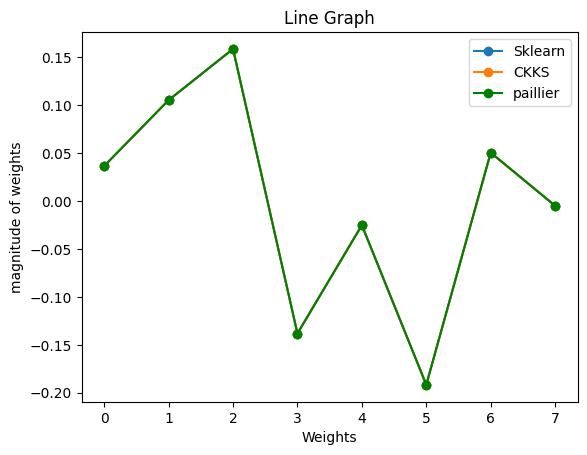

In [11]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='o')  
plt.plot(weights_unenc_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

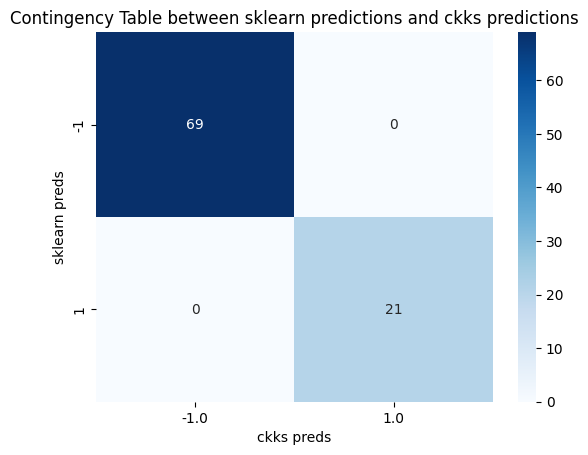

In [12]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

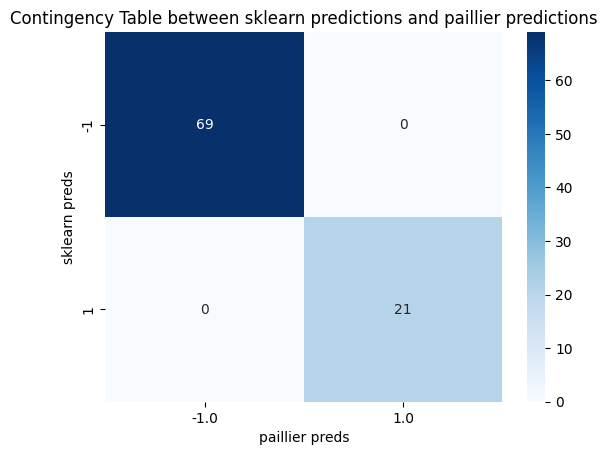

In [13]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

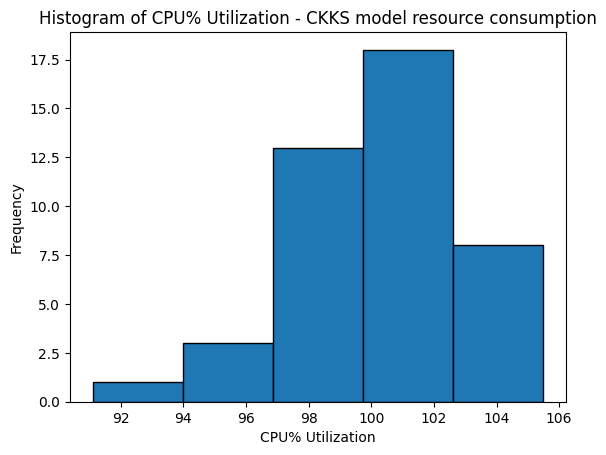

In [14]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
np.mean(filtered_ckks_cpu_util)
np.median(filtered_ckks_cpu_util)

100.2

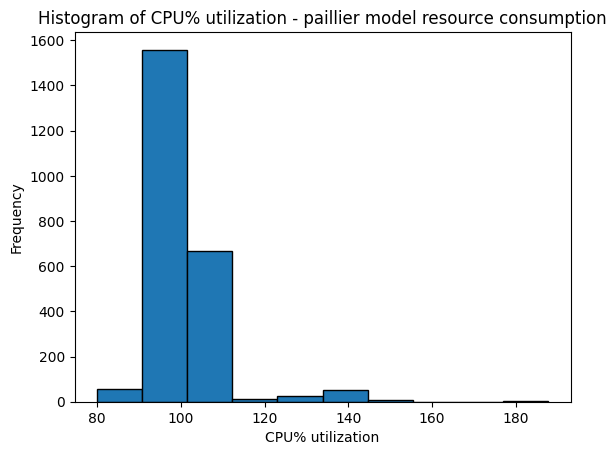

In [16]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
np.mean(filtered_paillier_cpu_util)
np.median(filtered_paillier_cpu_util)

99.6

Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

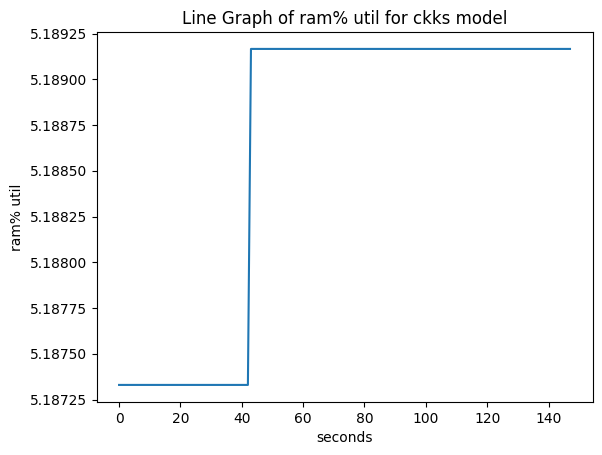

In [18]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [19]:
import numpy as np
print(np.mean(ram_usages_ckks))
print(np.median(ram_usages_ckks))

5.188632358158468
5.189165762509348


Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

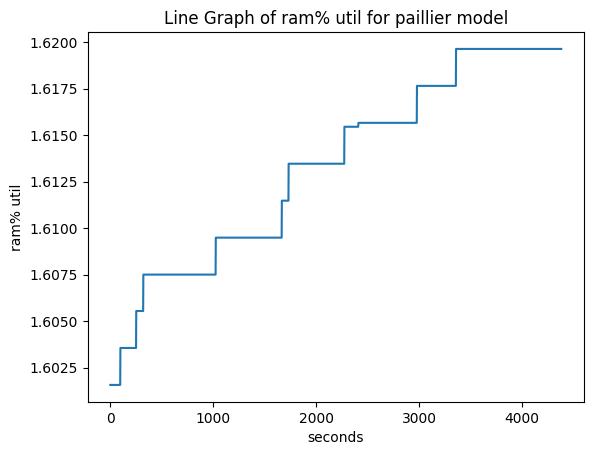

In [20]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [21]:
print(np.mean(ram_usages_paillier))
print(np.median(ram_usages_paillier))

1.6133044868059352
1.6134580744383564


In [22]:
np.mean(ram_usages_sklearn)

1.591938879466926

In [23]:
train_time_ckks

45.95845437049866

In [24]:
train_time_paillier

3022.875818967819

In [25]:
testing_time_ckks

1.3225440979003906

In [26]:
testing_time_paillier

118.59028315544128

In [27]:
print(f"accuracy sklearn model: {accuracy_sklearn}")
print(f"accuracy ckks model: {accuracy_ckks}")
print(f"accuracy paillier model: {accuracy_paillier}")

accuracy sklearn model: 0.7111111111111111
accuracy ckks model: 0.7111111111111111
accuracy paillier model: 0.7111111111111111


In [28]:
print(f"sklearn training time: {train_time_sklearn}")
print(f"sklearn testing time: {testing_time_sklearn}")
print(f"sklearn cpu usage: {cpu_usages_sklearn}")
print(f"sklearn ram usage: {ram_usages_sklearn}")

sklearn training time: 0.014532089233398438
sklearn testing time: 0.0003440380096435547
sklearn cpu usage: [2.0, 1.0, 1.0]
sklearn ram usage: [1.591938879466926, 1.591938879466926, 1.591938879466926]
